In [3]:
# import of needed classes
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


plt.set_cmap('gray')

In [4]:
#loading dataset into train and test samples
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

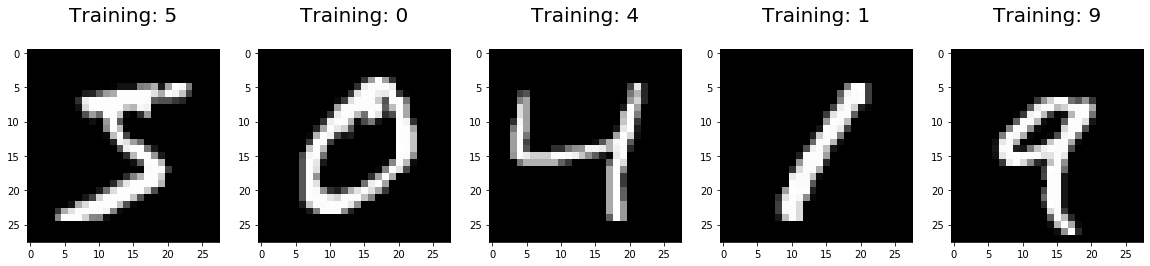

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [6]:
#reshape the numbers into 2d values
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [10]:
# running the regression took more than 20min without finishing, so Google brought me to using 'lbfgs' as solver which was way faster
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [14]:
#fit the regression model on the training sample
logisticRegr.fit(x_train_flat, y_train)

C:\Users\Jannik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Jannik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Jannik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Jannik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Jannik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number o

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
predictions = logisticRegr.predict(x_test_flat)

In [16]:
#get the accuracy of the model by using score function
"Accuracy"
score = logisticRegr.score(x_test_flat, y_test)
print(score)

0.918


In [17]:
#using the confusion matrix function of the sklearn dataset to show accuracy of every single digit
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

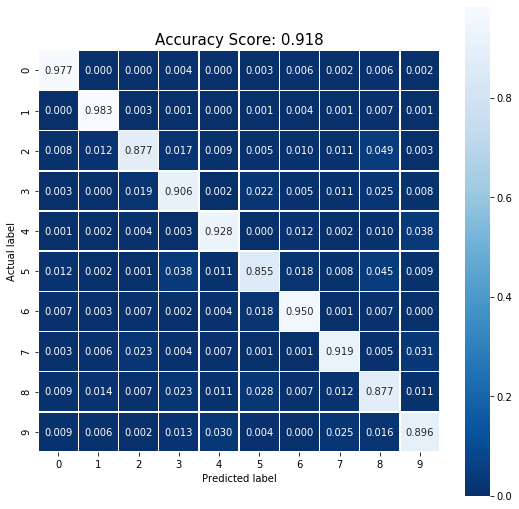

In [18]:
# plotting the matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

# Answer 
The Logistic Regression model is able to predict the right labels to the handwritten digits with an accuracy of 91,8 %. The matrix above shows that the digits 0, 1 and 6 are easiest so assign for the model since their accuracies are 97,7%, 98,3% and 95%. 
Task B showed us a similar outcome with the knn algorithm. These digits had the lowest error rate there aswell. 
The digit 5 has the lowest accuracy score. In some handwritings it has some big similarities with the 3 and the 8. The correlation matrix shows this effect with the accuracy score of 3,8% to predict a 5 as a 3 and 4,5% to predict the 5 as a 8. 
Same with the 2 and the accuracy of only 87,7% because of 4,9% of the actual 2's got wrongly predicted as a 8. 
Some examples of digits which are very hard to distinguish even for us humans can be found in our Task D.


